## Loading Dataframe and Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
df = pd.read_pickle("/kaggle/input/2d-floor-plan-dataset-with-text-descriptions-new/word_embeddings_dataframe.pkl")
df.head()

,File_Name,Text,Image_Path,BERT_Embeddings
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09..."
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1..."
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1..."
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02..."
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0..."


## Adjusting Image path according to Kaggle

In [4]:
# Function to modify image path
def modify_image_path(image_path):
    filename = os.path.basename(image_path).split("floorplan_image\\")[1]
    new_path = os.path.join("human_annotated_images", filename)
    return new_path

# Apply the function to the 'Image_Path' column in the DataFrame
df['Modified_Image_Path'] = df['Image_Path'].apply(modify_image_path)

df.head()

,File_Name,Text,Image_Path,BERT_Embeddings,Modified_Image_Path
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [5]:
df.drop(['Image_Path'], axis = 1, inplace = True)

In [6]:
# removed image path folder
df.rename(columns = {'Modified_Image_Path':'Image_Path'}, inplace = True)
df.head()

,File_Name,Text,BERT_Embeddings,Image_Path
0,10017,"The balcony juts out on the south side, with t...","[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...","[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...","[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


# Printing an Image

In [7]:
# Printing Input Directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/2d-floor-plan-dataset-with-text-descriptions-new
/kaggle/input/2d-floor-plan-dataset-with-text-descriptions-new/human_annotated_images


In [8]:
DIRECTORY = "/kaggle/input/2d-floor-plan-dataset-with-text-descriptions-new/"

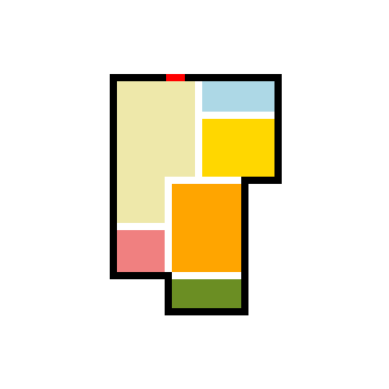

In [9]:
# Displaying an Image
import matplotlib.pyplot as plt
from PIL import Image

# Example image path
image_path = DIRECTORY + df['Image_Path'][0]

# Open the image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

# Splitting Dataset into test and Train

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Load BERT embeddings and image paths
X_text_embeddings = np.array(df['BERT_Embeddings'].tolist())
image_paths = df['Image_Path'].tolist()

# Load images
X_images = []
for path in image_paths:
    path = DIRECTORY + path
    image = Image.open(path)
    #onvert image to numpy array and normalize if needed
    image_array = np.array(image) / 255.0
    X_images.append(image_array)

# Convert lists to numpy arrays
X_text_embeddings = np.array(X_text_embeddings)
X_images = np.array(X_images)

# Reshape or normalize if required (already done in the provided code)

# Prepare target data (labels)
y = np.arange(len(df))  # Assuming each row corresponds to a unique label

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_images, X_test_images, y_train, y_test = train_test_split(
    X_text_embeddings, X_images, y, test_size=0.1, random_state=42
)

# Display shapes of the data
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)
print("y_train shape:", y_train.shape)
print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_test shape:", y_test.shape)


X_train_text shape: (3602, 1, 768)
X_train_images shape: (3602, 256, 256, 3)
y_train shape: (3602,)
X_test_text shape: (401, 1, 768)
X_test_images shape: (401, 256, 256, 3)
y_test shape: (401,)


In [11]:
# Reshape the text embeddings to remove the extra dimension
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)

# Display shapes after reshaping
print("Reshaped X_train_text shape:", X_train_text.shape)
print("Reshaped X_test_text shape:", X_test_text.shape)


Reshaped X_train_text shape: (3602, 768)
Reshaped X_test_text shape: (401, 768)


### Shape of Final Data

In [12]:
# Display shapes of the data
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)

print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)

X_train_text shape: (3602, 768)
X_train_images shape: (3602, 256, 256, 3)
X_test_text shape: (401, 768)
X_test_images shape: (401, 256, 256, 3)


In [13]:
type(X_train_images)

numpy.ndarray

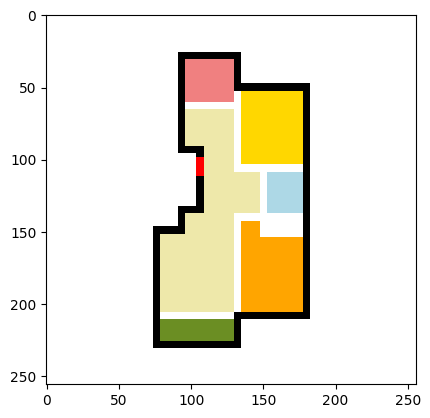

In [14]:
# displaying images
data = X_train_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [15]:
X_train_images.shape

(3602, 256, 256, 3)

## Resizing images to lower dimension

In [16]:
# DO NOT RUN THIS , skip to next cell.
import cv2
resized_images = []

# Define the new dimensions
new_width = 64
new_height = 64

for image in X_train_images:
    resized_img = cv2.resize(image, (new_width, new_height))  
    resized_images.append(resized_img)

# Now, resized_images will contain your resized images ready for passing into GAN


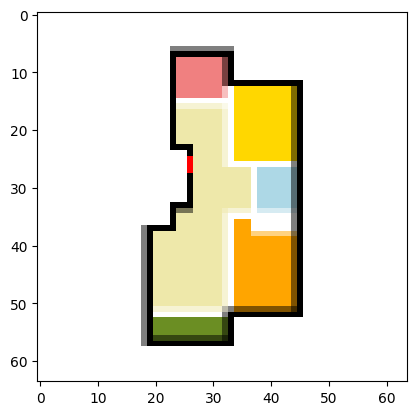

In [17]:
# displaying images
data = resized_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [18]:
# converting list to array
X_train_images_resized = np.array(resized_images)

In [19]:
print(X_train_images_resized.shape)
print(X_train_text.shape)

(3602, 64, 64, 3)
(3602, 768)


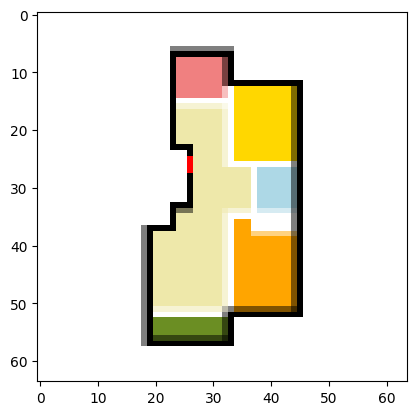

In [20]:
# displaying images
data = X_train_images_resized[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

# Applying GANs model

In [21]:
print(X_train_images_resized.shape)
print(X_train_text.shape)

(3602, 64, 64, 3)
(3602, 768)


## Using a subset of data to train (for initial testing) (done)

In [22]:
train_images = X_train_images_resized
train_text = X_train_text

#### this train_images and train_text data will be used to train our gans model

In [23]:
print(train_images.shape)
print(train_text.shape)

(3602, 64, 64, 3)
(3602, 768)


#### testing done, now will train on entire dataset.

# Generator Architecture

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_generator(embedding_size):
    model = models.Sequential()
    
    # Dense layer
    model.add(layers.Dense(8192, input_shape=(embedding_size,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Reshape layer
    model.add(layers.Reshape((4, 4, 512)))
    
    # Transposed convolutional layers
    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))
    
    return model

# Example usage:
generator = build_generator(embedding_size=768)
generator.summary()


2024-05-02 15:38:57.439212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 15:38:57.439282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 15:38:57.440896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │     6,299,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 256)      │     3,277,056 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       819,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │         4,803 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,640,259 (40.59 MB)

 Trainable params: 10,622,979 (40.52 MB)

 Non-trainable params: 17,280 (67.50 KB)

# Discriminator Architecture

In [25]:
def build_discriminator():
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Example usage:
discriminator = build_discriminator()
discriminator.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,314,753 (16.46 MB)

 Trainable params: 4,314,753 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
d_losses = []
g_losses = []

## Training loop

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

# Assume build_generator and build_discriminator functions are already defined as previously described.

# Build the generator and discriminator
generator = build_generator(embedding_size=768)
discriminator = build_discriminator()

# GAN Model definition
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_function):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_function = loss_function

    def train_step(self, data):
        real_images = data[0]
        embeddings = data[1]
        batch_size = tf.shape(real_images)[0]

        # Combine embeddings with noise
        generator_input = embeddings

        # Training the discriminator
        with tf.GradientTape() as disc_tape:
            generated_images = self.generator(generator_input, training=True)
            
            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            
            disc_loss = self.loss_function(tf.ones_like(real_output), real_output) + \
                        self.loss_function(tf.zeros_like(fake_output), fake_output)
            d_losses.append(disc_loss)

        # Gradient update for discriminator
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        # Training the generator
        with tf.GradientTape() as gen_tape:
            generated_images = self.generator(generator_input, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            gen_loss = self.loss_function(tf.ones_like(fake_output), fake_output)
            g_losses.append(gen_loss)

        # Gradient update for generator
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        
        
        return {'d_loss': disc_loss, 'g_loss': gen_loss}

# Instantiate the GAN model
gan = GAN(generator=generator, discriminator=discriminator)

gan.compile(
    g_optimizer=optimizers.Adam(1e-4),
    d_optimizer=optimizers.Adam(1e-4),
    loss_function=losses.BinaryCrossentropy()
)



# Loading Data

In [28]:
import tensorflow as tf

batch_size = 32
# Assuming train_images and train_text are your image and text data arrays respectively

# Create a dataset from the image and text data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_text))

# Shuffle and batch the dataset (optional)
train_dataset = train_dataset.shuffle(buffer_size=500).batch(batch_size)

# Print the shape of the dataset
print(train_dataset.element_spec)


(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 768), dtype=tf.float32, name=None))


# Training

In [29]:
hist = gan.fit(train_dataset, epochs=500)

Epoch 1/500
  1/113 ━━━━━━━━━━━━━━━━━━━━ 35:12 19s/step - d_loss: 1.3489 - g_loss: 0.6848

I0000 00:00:1714664361.398854    7674 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - d_loss: 0.4962 - g_loss: 4.9474 - loss: 0.0000e+00
Epoch 2/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - d_loss: 0.6321 - g_loss: 2.7228 - loss: 0.0000e+00
Epoch 3/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - d_loss: 0.8676 - g_loss: 2.1934 - loss: 0.0000e+00
Epoch 4/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - d_loss: 1.0114 - g_loss: 2.1305 - loss: 0.0000e+00
Epoch 5/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - d_loss: 0.6484 - g_loss: 1.9961 - loss: 0.0000e+00
Epoch 6/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - d_loss: 0.8731 - g_loss: 2.3587 - loss: 0.0000e+00
Epoch 7/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - d_loss: 0.8346 - g_loss: 2.2728 - loss: 0.0000e+00
Epoch 8/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - d_loss: 1.2911 - g_loss: 3.0509 - loss: 0.0000e+00
Epoch 9/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - d_loss: 0.5570 - g_loss: 3.4098 - loss: 0.0000e+00
Epoch 10/500
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65

In [160]:
# Save the model
gan.save("archi-gans-500epochs.keras")

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


In [34]:
train_images.shape[0]

(3602, 64, 64, 3)

# Generated Images

[3210]


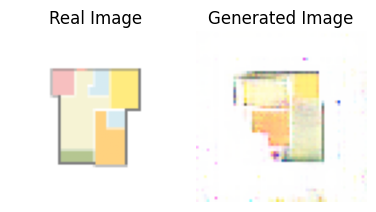

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of random text embeddings you want to extract
num_embeddings = 1  # Adjust this number as needed

# Randomly select indices to sample from train_text
random_indices = np.random.choice(train_images.shape[0], size=num_embeddings, replace=False)
print(random_indices)
# Extract random text embeddings and real images
random_text_embeddings = train_text[random_indices]
random_real_images = train_images[random_indices]

# Combine random noise with text embeddings
generator_input = random_text_embeddings

# Generate images using the generator with only text embeddings as input
generated_images = generator(random_text_embeddings, training=False)

# Plot both real and generated images side by side
plt.figure(figsize=(15, 10))
for i in range(num_embeddings):
    # Plot real image
    plt.subplot(4, 8, 2*i+1)
    plt.imshow((random_real_images[i] + 1) / 2)  # Scale image from [-1, 1] to [0, 1] for display
    plt.title("Real Image")
    plt.axis('off')

    # Plot generated image
    plt.subplot(4, 8, 2*i+2)
    plt.imshow((generated_images[i] + 1) / 2)  # Scale image from [-1, 1] to [0, 1] for display
    plt.title("Generated Image")
    plt.axis('off')

plt.tight_layout()
plt.show()


## More Generated Images

Shape of random text embeddings: (16, 768)


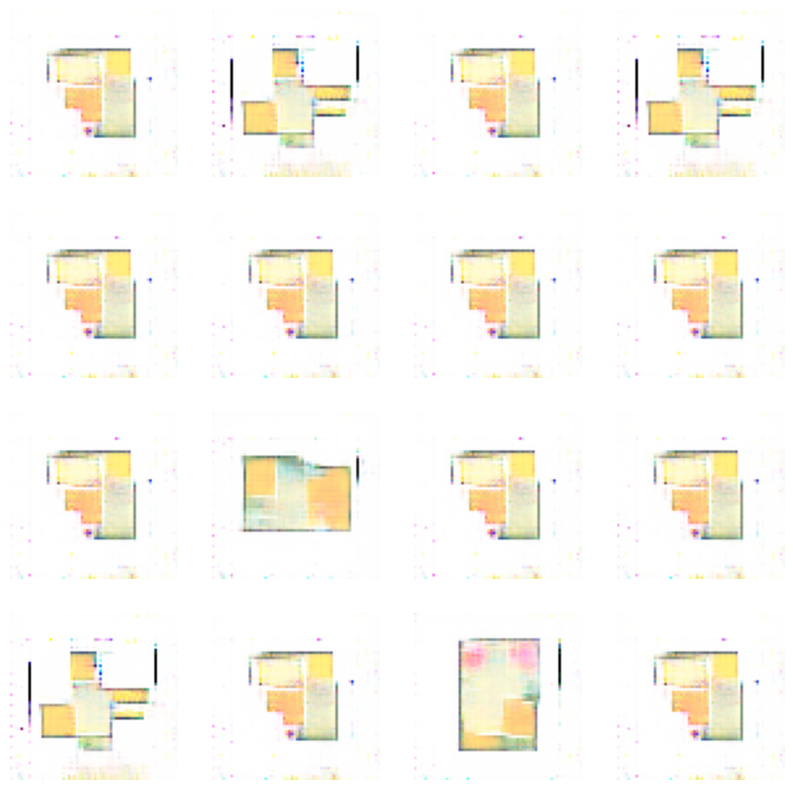

In [88]:
import matplotlib.pyplot as plt

import numpy as np
# Define the number of random text embeddings you want to extract
num_embeddings = 16  # Adjust this number as needed
# Randomly select indices to sample from train_text
random_indices = np.random.choice(train_text.shape[0], size=num_embeddings, replace=False)
# Extract random text embeddings
random_text_embeddings = train_text[random_indices]
# Verify the shape of the random text embeddings
print("Shape of random text embeddings:", random_text_embeddings.shape)

# Combine random noise with text embeddings
generator_input = random_text_embeddings

# Generate images using the generator with only text embeddings as input
generated_images = generator(random_text_embeddings, training=False)

# Plot or print the generated images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow((generated_images[i] + 1) / 2)  # Scale image from [-1, 1] to [0, 1] for display
    plt.axis('off')
plt.show()


## Testing from random text prompt

**Extracting word embeddings from text prompt through BERT**

In [133]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to tokenize text and get BERT embeddings
def get_bert_embeddings(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    
    # Forward pass through BERT model
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Extract hidden states (last layer) of BERT
    hidden_states = outputs.last_hidden_state
    
    # Average pooling of hidden states to get sentence embeddings
    sentence_embeddings = torch.mean(hidden_states, dim=1)
    
    return sentence_embeddings.numpy()
 

text = "the bathroom is at the east corner. The kitchen is in the south direction. hall is beside the kitchen and 20 m long."
bert_embeddings = get_bert_embeddings(text)
bert_embeddings.shape

(1, 768)

In [134]:
# Generate images using the generator with only text embeddings as input
generated_image = generator(bert_embeddings, training=False)
generated_image.shape

TensorShape([1, 64, 64, 3])

## Output

text prompt : the bathroom is at the east corner. The kitchen is in the south direction. hall is beside the kitchen and 20 m long.


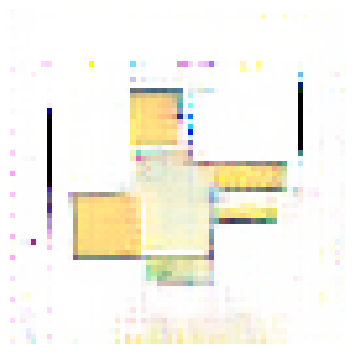

In [135]:
print(f"text prompt : {text}")
plt.figure(figsize=(20, 20))
plt.subplot(4, 4, i+1)
plt.imshow((generated_image[0] + 1) / 2)  # Scale image from [-1, 1] to [0, 1] for display
plt.axis('off')
plt.show()

## Plotting Loss

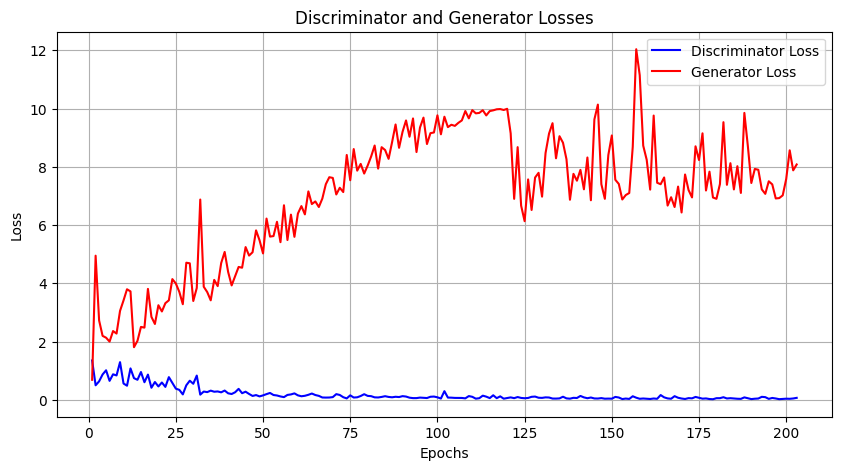

In [75]:
import matplotlib.pyplot as plt

# Plotting
epochs = range(1, len(d_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, d_loss, 'b', label='Discriminator Loss')
plt.plot(epochs, g_loss, 'r', label='Generator Loss')
plt.title('Discriminator and Generator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
